<a href="https://colab.research.google.com/github/tusharsharm/R-Practice/blob/main/PCA_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 8
### Tushar Sharma
#Principal Component Analysis

## Install the required packages

In [1]:
install.packages("ggplot2")
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the dataset
we will use mtcars dataset

In [2]:
# Load the mtcars dataset
data(mtcars)



In [14]:
print(mtcars)

                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0   

In [3]:
# Check the structure of the mtcars dataset
str(mtcars)


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


## Separate the numeric feature

In [4]:
# Separate the numeric features (all columns in mtcars are numeric)
mtcars_data <- mtcars



In [13]:
print(mtcars_data)

                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0   

## Standardize the data
The data is scaled using the `scale()` function to ensure each feature contributes equally to the analysis.

In [5]:
# Standardize the data (important for PCA)
mtcars_scaled <- scale(mtcars_data)



In [11]:
print(mtcars_scaled)

                            mpg        cyl        disp          hp        drat
Mazda RX4            0.15088482 -0.1049878 -0.57061982 -0.53509284  0.56751369
Mazda RX4 Wag        0.15088482 -0.1049878 -0.57061982 -0.53509284  0.56751369
Datsun 710           0.44954345 -1.2248578 -0.99018209 -0.78304046  0.47399959
Hornet 4 Drive       0.21725341 -0.1049878  0.22009369 -0.53509284 -0.96611753
Hornet Sportabout   -0.23073453  1.0148821  1.04308123  0.41294217 -0.83519779
Valiant             -0.33028740 -0.1049878 -0.04616698 -0.60801861 -1.56460776
Duster 360          -0.96078893  1.0148821  1.04308123  1.43390296 -0.72298087
Merc 240D            0.71501778 -1.2248578 -0.67793094 -1.23518023  0.17475447
Merc 230             0.44954345 -1.2248578 -0.72553512 -0.75387015  0.60491932
Merc 280            -0.14777380 -0.1049878 -0.50929918 -0.34548584  0.60491932
Merc 280C           -0.38006384 -0.1049878 -0.50929918 -0.34548584  0.60491932
Merc 450SE          -0.61235388  1.0148821  0.363713

## Perform PCA
We use `prcomp()` to compute the principal components. The `center = TRUE` and `scale. = TRUE` arguments ensure that the data is centered (mean = 0) and scaled (variance = 1) before PCA.

In [6]:
# Perform PCA using the prcomp function
pca_result_mtcars <- prcomp(mtcars_scaled, center = TRUE, scale. = TRUE)



In [12]:
print(pca_result_mtcars)

Standard deviations (1, .., p=11):
 [1] 2.5706809 1.6280258 0.7919579 0.5192277 0.4727061 0.4599958 0.3677798
 [8] 0.3505730 0.2775728 0.2281128 0.1484736

Rotation (n x k) = (11 x 11):
            PC1         PC2         PC3          PC4         PC5         PC6
mpg  -0.3625305  0.01612440 -0.22574419 -0.022540255 -0.10284468 -0.10879743
cyl   0.3739160  0.04374371 -0.17531118 -0.002591838 -0.05848381  0.16855369
disp  0.3681852 -0.04932413 -0.06148414  0.256607885 -0.39399530 -0.33616451
hp    0.3300569  0.24878402  0.14001476 -0.067676157 -0.54004744  0.07143563
drat -0.2941514  0.27469408  0.16118879  0.854828743 -0.07732727  0.24449705
wt    0.3461033 -0.14303825  0.34181851  0.245899314  0.07502912 -0.46493964
qsec -0.2004563 -0.46337482  0.40316904  0.068076532  0.16466591 -0.33048032
vs   -0.3065113 -0.23164699  0.42881517 -0.214848616 -0.59953955  0.19401702
am   -0.2349429  0.42941765 -0.20576657 -0.030462908 -0.08978128 -0.57081745
gear -0.2069162  0.46234863  0.28977993 -0.2

In [7]:
# Summary of PCA results
summary(pca_result_mtcars)



Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

In [8]:
# Principal components loadings
pca_result_mtcars$rotation



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
mpg,-0.3625305,0.01612440,-0.22574419,-0.022540255,-0.10284468,-0.10879743,0.367723810,0.754091423,-0.235701617,-0.13928524,-0.124895628
cyl,0.3739160,0.04374371,-0.17531118,-0.002591838,-0.05848381,0.16855369,0.057277736,0.230824925,-0.054035270,0.84641949,-0.140695441
disp,0.3681852,-0.04932413,-0.06148414,0.256607885,-0.39399530,-0.33616451,0.214303077,-0.001142134,-0.198427848,-0.04937979,0.660606481
hp,0.3300569,0.24878402,0.14001476,-0.067676157,-0.54004744,0.07143563,-0.001495989,0.222358441,0.575830072,-0.24782351,-0.256492062
drat,-0.2941514,0.27469408,0.16118879,0.854828743,-0.07732727,0.24449705,0.021119857,-0.032193501,0.046901228,0.10149369,-0.039530246
wt,0.3461033,-0.14303825,0.34181851,0.245899314,0.07502912,-0.46493964,-0.020668302,0.008571929,-0.359498251,-0.09439426,-0.567448697
qsec,-0.2004563,-0.46337482,0.40316904,0.068076532,0.16466591,-0.33048032,0.050010522,0.231840021,0.528377185,0.27067295,0.181361780
vs,-0.3065113,-0.23164699,0.42881517,-0.214848616,-0.59953955,0.19401702,-0.265780836,-0.025935128,-0.358582624,0.15903909,0.008414634
am,-0.2349429,0.42941765,-0.20576657,-0.030462908,-0.08978128,-0.57081745,-0.587305101,0.059746952,0.047403982,0.17778541,0.029823537
gear,-0.2069162,0.46234863,0.28977993,-0.264690521,-0.04832960,-0.24356284,0.605097617,-0.336150240,0.001735039,0.21382515,-0.053507085


In [9]:
# Variance explained by each principal component
pca_result_mtcars$sdev^2 / sum(pca_result_mtcars$sdev^2)



[1] 0.600763659 0.240951627 0.057017934 0.024508858 0.020313737 0.019236011
 [7] 0.012296544 0.011172858 0.007004241 0.004730495 0.002004037

## Visualization
A scatter plot of the first two principal components (PC1 vs. PC2) is created to visualize how the cars are distributed along these components.

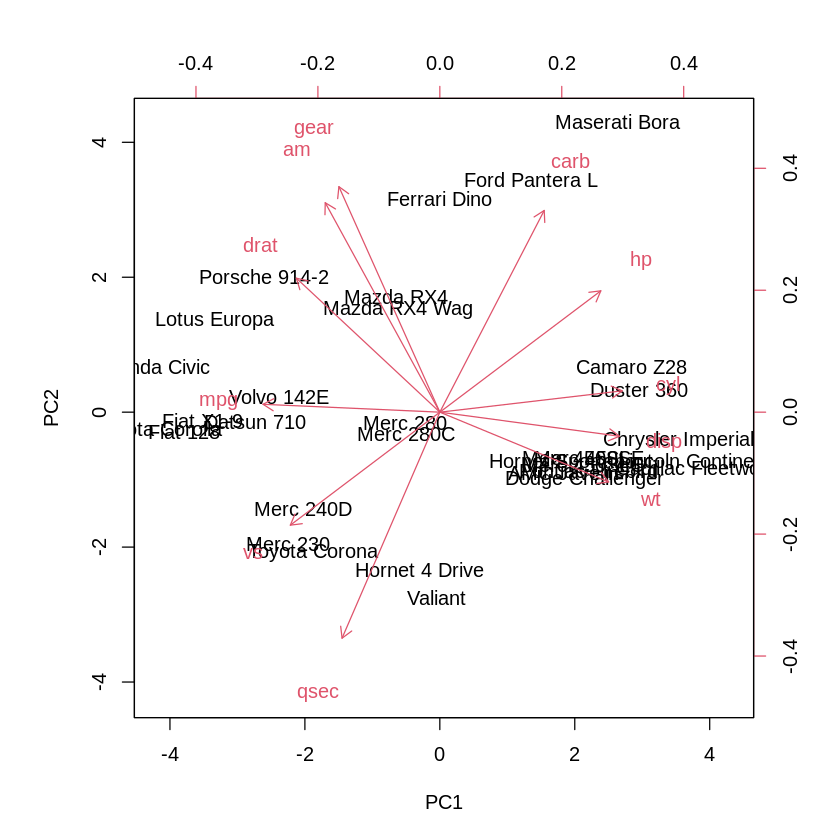

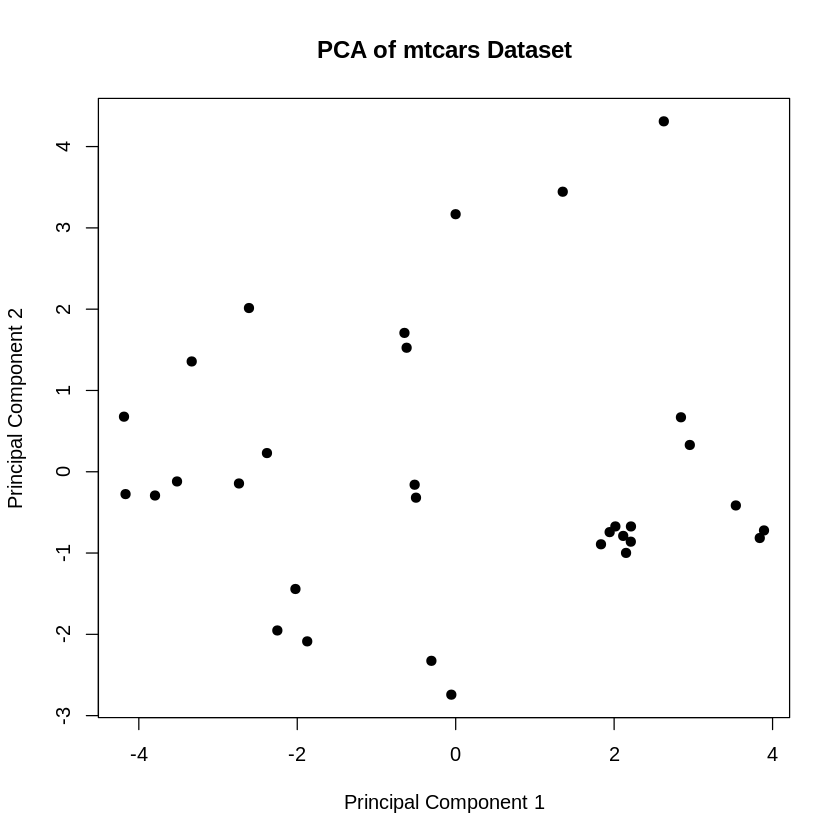

In [10]:
# Plotting the PCA result
# Biplot shows the relationship between the first two principal components
biplot(pca_result_mtcars, scale = 0)

# Plot the first two principal components (PC1 vs PC2)
plot(pca_result_mtcars$x[, 1], pca_result_mtcars$x[, 2],
     xlab = "Principal Component 1", ylab = "Principal Component 2",
     main = "PCA of mtcars Dataset", pch = 19)